In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gc
from sklearn import svm
from category_encoders import WOEEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline
import ast
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import *
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [270]:
df = pd.read_csv('training.csv')

In [271]:
df1 = pd.read_csv('traing labels.csv')

In [272]:
pred_dict = {'functional':1, 'functional needs repair':1, 'non functional':0}

In [273]:
df1['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [274]:
df['status_group'] = df1['status_group'].map(pred_dict)

In [275]:
df[target].value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

In [276]:
# df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df[target].isna().sum()


0

In [277]:
target = 'status_group'

In [278]:
import xgboost as xgb
cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]
df[cate] = df[cate]
cate

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [279]:
X,y = df[used_cols], df[target]

In [280]:
df[cate]

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,VWC,NaN,False,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,VWC,NaN,True,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [281]:
le = LabelEncoder()
woe = WOEEncoder()

In [283]:
woe.fit(df[cate],df[target])
df[cate] = woe.transform(df[cate])
    

In [257]:
df[cate]

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.273786,1.278713,0.268853,0.677445,0.388985,0.627066,0.948366,0.873302,0.067450,0.059813,0.000016,-0.153914,1.815534,-0.097046,0.376213,0.376213,0.376213,-0.176906,-0.013100,1.044652,1.044652,0.115811,0.115811,0.495996,0.495996,0.362610,0.362610,-0.057030,0.379126,0.193830
1,0.312572,0.914748,1.108904,-0.016751,-0.090414,1.320213,-0.549719,0.058639,0.120504,-0.270634,0.000016,0.044838,-0.126060,0.034368,0.376213,0.376213,0.376213,0.368528,-0.013100,-0.374904,-0.374904,0.115811,0.115811,0.014014,0.014014,0.577184,0.577184,0.205216,0.379126,0.193830
2,-0.012014,1.725678,0.825668,0.914748,0.166077,-0.320466,0.300260,-0.079505,1.137891,0.059813,0.000016,-0.153914,1.831038,0.034368,0.376213,0.376213,0.376213,-0.176906,-0.013100,0.489178,0.489178,0.115811,0.115811,0.495996,0.495996,-0.784097,-0.784097,0.205216,-0.582060,0.193830
3,-0.566857,0.196211,-0.165611,0.000000,-0.695391,-0.366186,-0.978679,-1.472521,-1.821473,0.059813,0.000016,-0.153914,-0.126060,0.034368,-0.070975,-0.150088,-0.150088,-0.176906,-0.013100,-0.374904,-0.374904,0.115811,0.115811,-3.906856,-3.906856,-0.335742,-0.319804,-0.057030,-0.582060,0.193830
4,-0.372292,0.000000,-0.072161,-0.176861,-0.090414,0.627066,-0.014063,-0.113301,0.914748,0.059813,0.000016,-0.308775,-0.126060,0.034368,0.376213,0.376213,0.376213,0.205685,0.013961,-0.374904,-0.374904,0.115811,0.115811,0.267114,0.267114,0.577184,0.577184,0.205216,0.379126,0.193830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-0.092750,1.543356,1.543356,0.000000,0.166077,1.137891,0.265408,1.479843,2.878357,0.059813,0.000016,0.837017,3.498745,0.034368,0.376213,0.376213,0.376213,1.113960,-0.013100,0.489178,0.489178,0.115811,0.115811,0.495996,0.495996,0.362610,0.362610,-0.057030,0.379126,0.193830
59396,1.320213,2.706507,2.301042,0.000000,0.329264,2.236503,0.948366,1.180161,0.332826,0.059813,0.000016,-0.153914,2.747329,0.034368,0.376213,0.376213,0.376213,-0.176906,-0.013100,1.044652,1.044652,0.115811,0.115811,0.495996,0.495996,0.354641,0.196414,0.205216,0.379126,0.193830
59397,-0.256890,0.214597,0.225294,-0.589330,0.329264,0.627066,-0.030579,0.424766,-0.019562,0.059813,0.000016,-0.153914,-0.126060,-0.097046,0.048585,0.048585,0.332831,-0.176906,-0.013100,0.748678,0.748678,1.023481,0.798916,0.495996,0.495996,-0.335742,-0.319804,-0.057030,0.266974,0.266974
59398,0.048988,0.914748,-0.183865,0.000000,0.329264,-0.625697,-0.257386,-0.477277,-0.545655,0.059813,0.000016,-0.153914,-0.126060,0.034368,0.592060,0.592060,0.332831,-0.176906,-0.013100,-0.374904,-0.374904,0.115811,0.115811,0.014014,0.014014,-0.264222,-0.264222,-0.057030,0.266974,0.266974


In [258]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,0.273786,1.278713,1390,0.268853,34.938093,-9.856322,0.677445,0,0.388985,0.627066,0.948366,11,5,0.873302,0.067450,109,0.059813,0.000016,-0.153914,1.815534,-0.097046,1999,0.376213,0.376213,0.376213,-0.176906,-0.013100,1.044652,1.044652,0.115811,0.115811,0.495996,0.495996,0.362610,0.362610,-0.057030,0.379126,0.193830,1
1,8776,0.0,0.312572,0.914748,1399,1.108904,34.698766,-2.147466,-0.016751,0,-0.090414,1.320213,-0.549719,20,2,0.058639,0.120504,280,-0.270634,0.000016,0.044838,-0.126060,0.034368,2010,0.376213,0.376213,0.376213,0.368528,-0.013100,-0.374904,-0.374904,0.115811,0.115811,0.014014,0.014014,0.577184,0.577184,0.205216,0.379126,0.193830,1
2,34310,25.0,-0.012014,1.725678,686,0.825668,37.460664,-3.821329,0.914748,0,0.166077,-0.320466,0.300260,21,4,-0.079505,1.137891,250,0.059813,0.000016,-0.153914,1.831038,0.034368,2009,0.376213,0.376213,0.376213,-0.176906,-0.013100,0.489178,0.489178,0.115811,0.115811,0.495996,0.495996,-0.784097,-0.784097,0.205216,-0.582060,0.193830,1
3,67743,0.0,-0.566857,0.196211,263,-0.165611,38.486161,-11.155298,0.000000,0,-0.695391,-0.366186,-0.978679,90,63,-1.472521,-1.821473,58,0.059813,0.000016,-0.153914,-0.126060,0.034368,1986,-0.070975,-0.150088,-0.150088,-0.176906,-0.013100,-0.374904,-0.374904,0.115811,0.115811,-3.906856,-3.906856,-0.335742,-0.319804,-0.057030,-0.582060,0.193830,0
4,19728,0.0,-0.372292,0.000000,0,-0.072161,31.130847,-1.825359,-0.176861,0,-0.090414,0.627066,-0.014063,18,1,-0.113301,0.914748,0,0.059813,0.000016,-0.308775,-0.126060,0.034368,0,0.376213,0.376213,0.376213,0.205685,0.013961,-0.374904,-0.374904,0.115811,0.115811,0.267114,0.267114,0.577184,0.577184,0.205216,0.379126,0.193830,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,-0.092750,1.543356,1210,1.543356,37.169807,-3.253847,0.000000,0,0.166077,1.137891,0.265408,3,5,1.479843,2.878357,125,0.059813,0.000016,0.837017,3.498745,0.034368,1999,0.376213,0.376213,0.376213,1.113960,-0.013100,0.489178,0.489178,0.115811,0.115811,0.495996,0.495996,0.362610,0.362610,-0.057030,0.379126,0.193830,1
59396,27263,4700.0,1.320213,2.706507,1212,2.301042,35.249991,-9.070629,0.000000,0,0.329264,2.236503,0.948366,11,4,1.180161,0.332826,56,0.059813,0.000016,-0.153914,2.747329,0.034368,1996,0.376213,0.376213,0.376213,-0.176906,-0.013100,1.044652,1.044652,0.115811,0.115811,0.495996,0.495996,0.354641,0.196414,0.205216,0.379126,0.193830,1
59397,37057,0.0,-0.256890,0.214597,0,0.225294,34.017087,-8.750434,-0.589330,0,0.329264,0.627066,-0.030579,12,7,0.424766,-0.019562,0,0.059813,0.000016,-0.153914,-0.126060,-0.097046,0,0.048585,0.048585,0.332831,-0.176906,-0.013100,0.748678,0.748678,1.023481,0.798916,0.495996,0.495996,-0.335742,-0.319804,-0.057030,0.266974,0.266974,1
59398,31282,0.0,0.048988,0.914748,0,-0.183865,35.861315,-6.378573,0.000000,0,0.329264,-0.625697,-0.257386,1,4,-0.477277,-0.545655,0,0.059813,0.000016,-0.153914,-0.126060,0.034368,0,0.592060,0.592060,0.332831,-0.176906,-0.013100,-0.374904,-0.374904,0.115811,0.115811,0.014014,0.014014,-0.264222,-0.264222,-0.057030,0.266974,0.266974,1


In [259]:
used_cols = [c for c in df.columns.tolist() if c not in target if c not in ['id']]

In [309]:
X,y = df[used_cols], df[target]

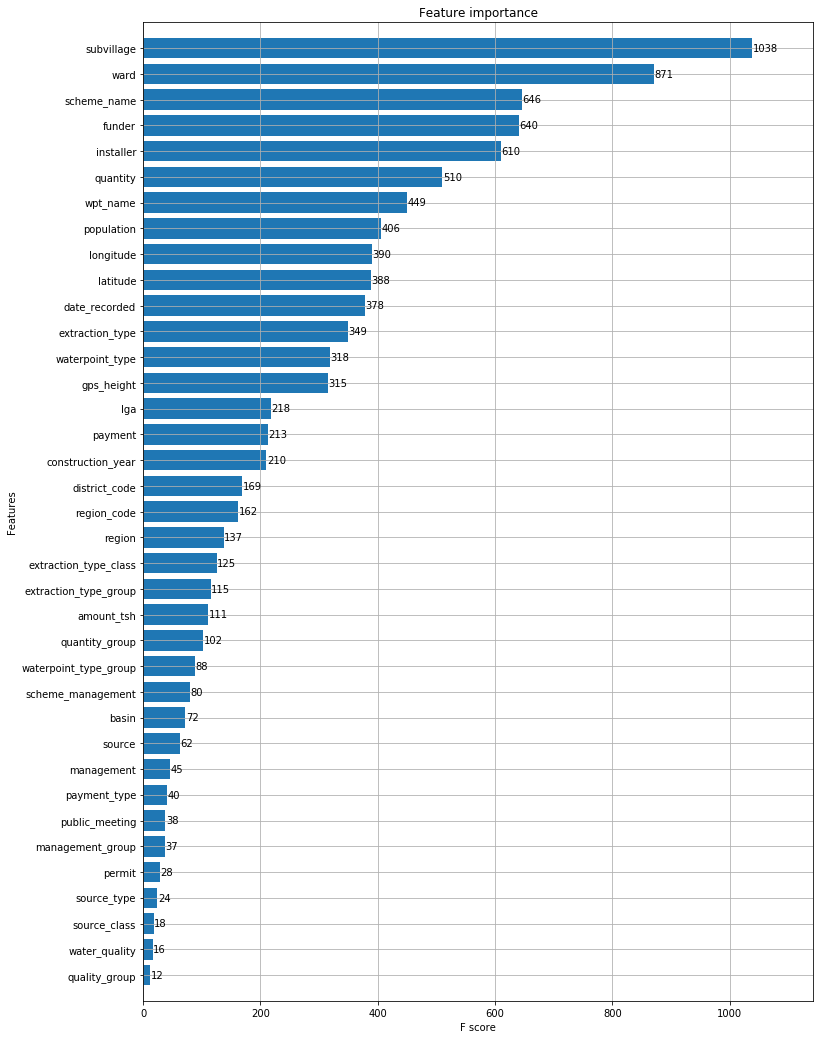

In [310]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, n_jobs=-1)
clf.fit(X, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [284]:
df= pd.read_csv('test.csv')

In [285]:
df[cate] = woe.transform(df[cate])

In [307]:
X = df[used_cols]

In [311]:
preds = clf.predict(X)

In [312]:
pred_dict = {1:'functional',  0:'non functional'}

In [313]:
preds.shape

(14850,)

In [314]:
preds

array([0, 1, 0, ..., 1, 1, 0])

In [317]:
df['status_group'] = preds

In [318]:
sumbit = pd.DataFrame(df['status_group'].map(pred_dict))

In [319]:
sumbit['id'] = df['id']

In [320]:
sumbit = sumbit[['id','status_group']]

In [321]:
sumbit.to_csv('roughsub3.csv', index=False)

In [ ]:
# {v: k for k, v in pred_dict.items()}

In [262]:
lr = LogisticRegression()

In [266]:
scores = cross_val_score(lr,X,y,cv=5, scoring='roc_auc')
print(scores.mean(),'+/-',scores.std)

0.9245695050585964 +/- <built-in method std of numpy.ndarray object at 0x1a30dc9710>


In [267]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)